In [24]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


from mpl_toolkits.mplot3d import Axes3D
pj = os.path.join

%matplotlib inline

The raw data file is a csv containing 'snippets' of flight trajectories from over a hundred planes, across different times and locations.  "TCode" is "transponder code", which uniquely identifies an aircraft.

In [4]:
DATA_DIR = "data/"

In [43]:
g_data_file = "nmacs_08252017.csv"
g_color_list = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'r', 'g', 'b']

In [13]:
df = pd.read_csv(pj(DATA_DIR, DATA_FILE))
df

,Date,Time,TCode,Altitude,Latitude,Longitude
0,7/23/2017,2017-07-23 19:57:20+0000,A7D1EE,3600,35.675900,-79.404602
1,7/23/2017,2017-07-23 19:57:20+0000,A7D1EE,3600,35.676701,-79.404739
2,7/23/2017,2017-07-23 19:57:20+0000,A7D1EE,3600,35.677589,-79.404907
3,7/23/2017,2017-07-23 19:57:20+0000,A7D1EE,3600,35.678242,-79.404999
4,7/23/2017,2017-07-23 19:57:20+0000,A7D1EE,3600,35.678650,-79.405121
5,7/23/2017,2017-07-23 19:57:20+0000,A7D1EE,3600,35.680611,-79.405441
6,7/23/2017,2017-07-23 19:57:20+0000,A7D1EE,3600,35.681808,-79.405632
7,7/23/2017,2017-07-23 19:57:20+0000,A7D1EE,3600,35.682541,-79.405800
8,7/23/2017,2017-07-23 19:57:20+0000,A7D1EE,3600,35.683311,-79.405907
9,7/23/2017,2017-07-23 19:57:20+0000,A7D1EE,3600,35.684010,-79.406029


In [17]:
print( "# of records: ", len(df) )
print( "# of planes: ", len(df["TCode"].unique()) )
print( "# of unique days: ", len(df["Date"].unique()) )
print( "# of unique times: ", len(df["Time"].unique()) )

# of records:  7821
# of planes:  122
# of unique days:  49
# of unique times:  435


In [18]:
df["Latitude"][df["TCode"]=="A7FA3E"]

17    35.684570
18    35.683830
19    35.683590
20    35.682800
21    35.682629
22    35.681782
23    35.681641
24    35.681301
25    35.680981
26    35.680660
27    35.679379
28    35.679031
29    35.678749
30    35.678429
31    35.678101
32    35.677910
Name: Latitude, dtype: float64

In [52]:
def plot_flight(tcode, start_time, ax, color='b'):
    x = df["Longitude"][ (df["TCode"]==tcode) & (df["Time"]==start_time) ].values
    y = df["Latitude"][ (df["TCode"]==tcode) & (df["Time"]==start_time) ].values
    z = df["Altitude"][ (df["TCode"]==tcode) & (df["Time"]==start_time) ].values
    
    h, = ax.plot(x,y,zs=z, zdir='z', c=color, label=tcode)
    ax.scatter(x[-1], y[-1], zs=z[-1], c=color, s=16)

    return h

In [55]:
def plot_flights(tcode):
    start_date = df["Date"][df["TCode"]==tcode].values[0]
    start_time = df["Time"][df["TCode"]==tcode].values[0]
    tcodes = df["TCode"][ (df["Date"]==start_date) & (df["Time"]==start_time) ].unique()
    
    fig = plt.figure(figsize=(16,16))
    ax = fig.add_subplot(111, projection='3d')
    handles = []
    for i,tc in enumerate(tcodes):
        handles.append( plot_flight(tc, start_time, ax, g_color_list[i]) )

    plt.legend(handles=handles)
    plt.title(start_date + ", " + start_time)


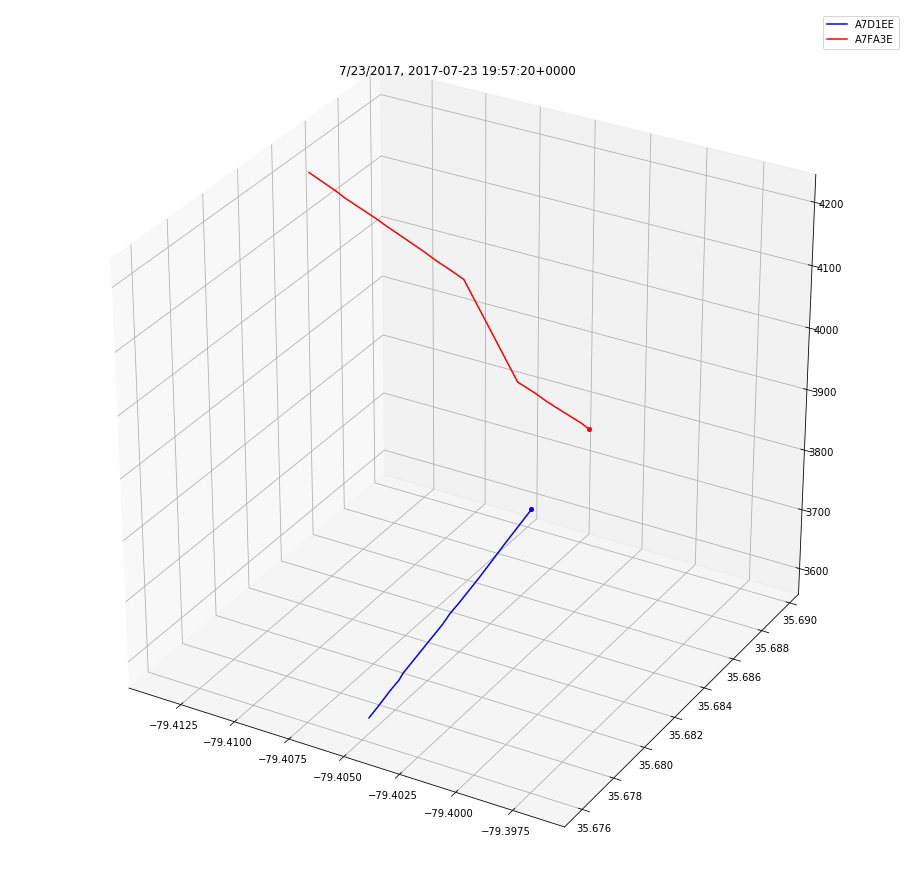

In [58]:
plot_flights( df["TCode"].unique()[0] )

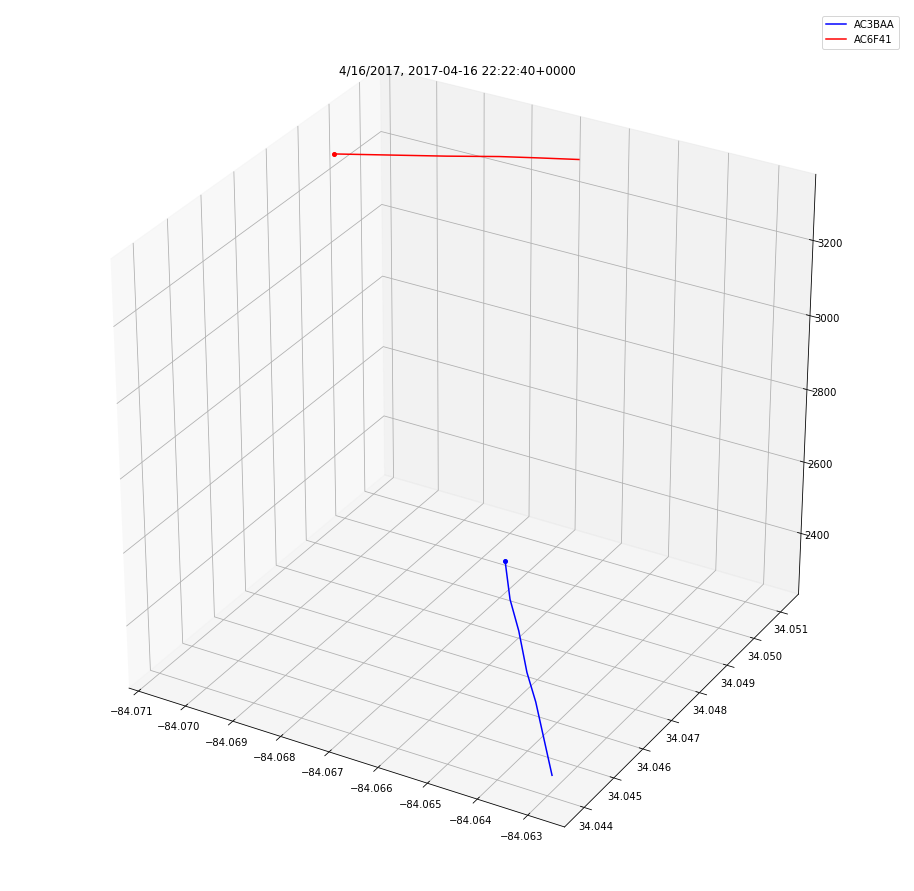

In [59]:
plot_flights( df["TCode"].unique()[50] )

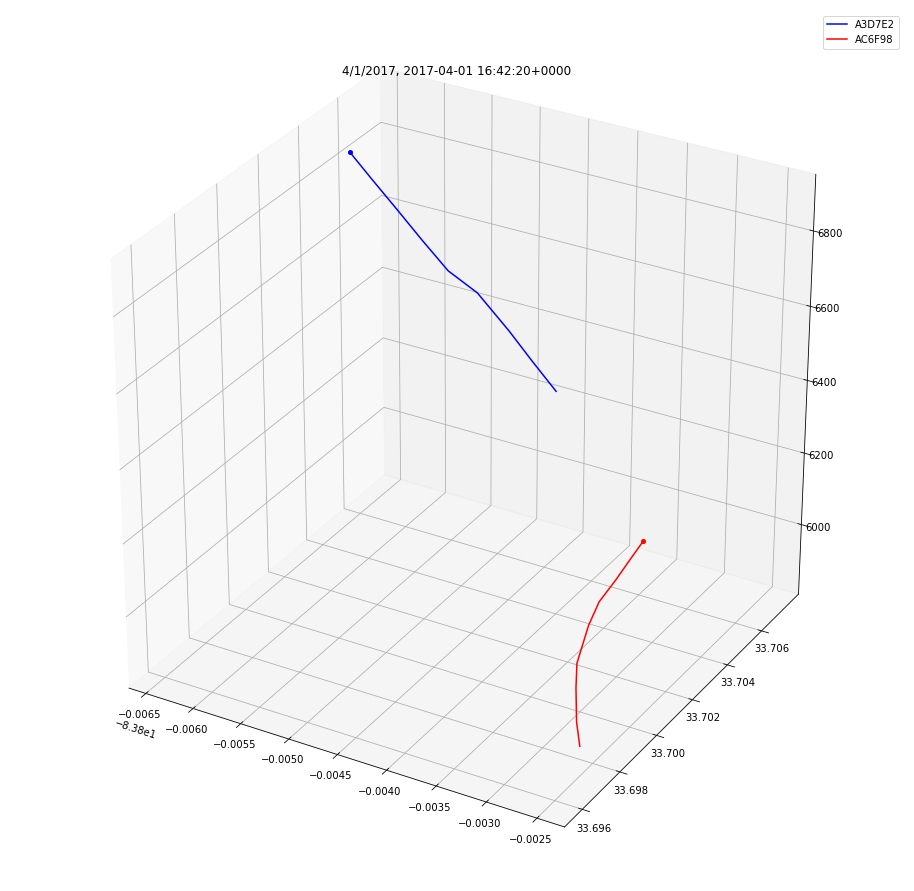

In [61]:
plot_flights( df["TCode"].unique()[100] )